<a href="https://www.kaggle.com/code/mariambadrmb/fashion-mnist-clasification?scriptVersionId=253569051" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## 📌 About the Project

The goal of this project is to build a neural network model that can recognize the type of clothing item from a grayscale image (28x28 pixels), belonging to one of 10 classes in the Fashion MNIST dataset.


## 🛠️ Libraries Used


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten , Conv2D , MaxPooling2D , Dropout, BatchNormalization
from tensorflow.keras.utils import  to_categorical

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv
import os

2025-07-31 21:49:21.400988: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753998561.827852      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753998561.937996      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## 1- Load fashion_mnist Dataset from Keras

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Explore Dataset

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

Number of classes: 10


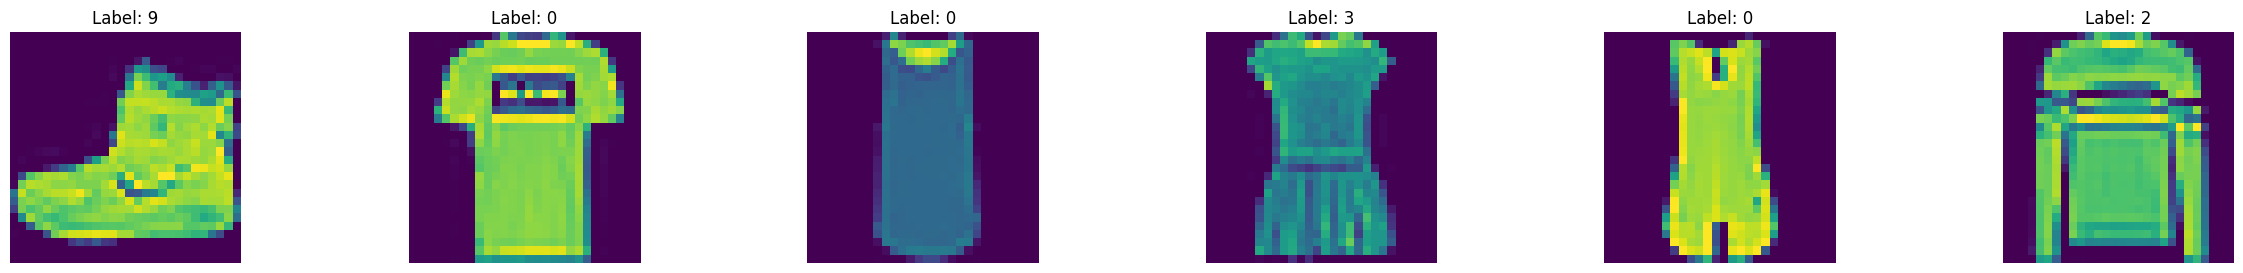

In [5]:
plt.figure(figsize=(30, 3))

for index, (image, label) in enumerate(zip(X_train[0:6], y_train[0:6])):
    plt.subplot(1, 6, index + 1)
    image = image.reshape(28, 28,1)
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.show()

## 2- PreProcessing The Dataset

In [6]:
valid = 0.001 * X_train.shape[0]
X_validation = X_train[:int(valid)]
y_validation = y_train[:int(valid)]
X_train = X_train[int(valid):]
y_train = y_train[int(valid):]

In [7]:
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0
X_validation = np.array(X_validation) / 255.0

X_train = X_train.reshape(-1, 28, 28 , 1)
X_test = X_test.reshape(-1, 28, 28 , 1)
X_validation = X_validation.reshape(-1, 28, 28, 1)

## 3- 🧠 Building and Training the CNN Model

We designed a **Convolutional Neural Network (CNN)** to classify images from the Fashion MNIST dataset. The architecture consists of multiple convolutional and pooling layers to extract hierarchical features, followed by fully connected layers for final classification.

### 🏗️ Model Architecture:
- **Conv2D + ReLU + BatchNormalization + MaxPooling**: Repeated three times with increasing filter sizes (32 → 64 → 128).
- **Flatten + Dense + Dropout**: The output is flattened and passed through a fully connected layer with dropout to reduce overfitting.
- **Output Layer**: A Dense layer with 10 neurons and softmax activation for multi-class classification.

### ⚙️ Compilation:
- **Optimizer**: Adam
- **Loss Function**: Sparse Categorical Crossentropy (since labels are integers)
- **Metric**: Accuracy

### 🛑 Early Stopping:
We used an early stopping callback with `patience=7` to halt training if validation performance stops improving.

### 🚀 Model Training:
The model is trained over 25 epochs with a batch size of 64, and performance is evaluated using a validation set.


In [8]:
model = Sequential([
    Conv2D(32 , (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-31 21:49:44.652260: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
early_stop_cb = tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True)

history_CNN  = model.fit(
    X_train, y_train,
    epochs = 25,
    batch_size = 64,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stop_cb]
)

Epoch 1/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 45s 43ms/step - accuracy: 0.7594 - loss: 0.7044 - val_accuracy: 0.8667 - val_loss: 0.3490
Epoch 2/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.8677 - loss: 0.3600 - val_accuracy: 0.9500 - val_loss: 0.2341
Epoch 3/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.8875 - loss: 0.3120 - val_accuracy: 0.8667 - val_loss: 0.2800
Epoch 4/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.8998 - loss: 0.2749 - val_accuracy: 0.8667 - val_loss: 0.2451
Epoch 5/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9054 - loss: 0.2564 - val_accuracy: 0.9333 - val_loss: 0.1869
Epoch 6/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9122 - loss: 0.2357 - val_accuracy: 0.9167 - val_loss: 0.2662
Epoch 7/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.9182 - loss: 0.2170 - val_accuracy: 0.8667 - val_loss: 0.2386
Epoch 8/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.9252 - loss: 0.2024 - 

## 📊 Training Performance Visualization

To better understand the model's learning progress, we visualize the **training and validation accuracy and loss** over epochs.

This helps identify:
- Whether the model is overfitting or underfitting.
- How quickly the model converges.
- The stability of the training process.

The following plot shows:
- Training vs. Validation Accuracy
- Training vs. Validation Loss


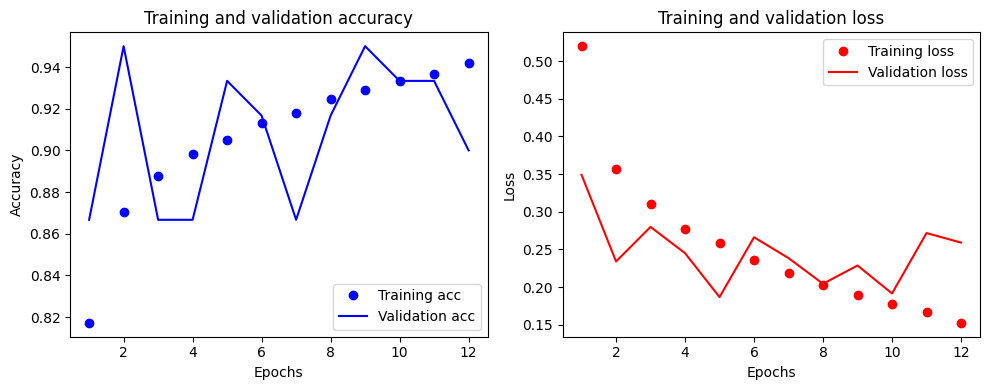

In [11]:
acc = history_CNN.history['accuracy']
val_acc = history_CNN.history['val_accuracy']
loss = history_CNN.history['loss']
val_loss = history_CNN.history['val_loss']


epochs = range(1, len(acc) + 1)


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 🔮 Model Predictions on Test Data

After training and validating the model, we now use it to **predict the classes** of the unseen test data.

This step outputs the predicted probabilities or class scores for each test image, which can used for evaluation.


In [12]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


## 💾 Saving Predictions to CSV

After generating predictions from the trained CNN model, we convert the probabilities to class labels using `argmax`. We then save these predictions to a CSV file, which contains:
- **Id**: Index of the test image.
- **Label**: Predicted class label (0–9).

This CSV file can be used for submission or further analysis.


In [13]:
predicted_classes = np.argmax(predictions, axis=1)


df = pd.DataFrame({
    'Id': np.arange(len(predicted_classes)),
    'Label': predicted_classes
})

df.to_csv('fashion_mnist_predictions.csv', index=False)

## 4- ✅ Model Evaluation on Test Set

After training and validating the CNN model, we evaluate its performance on the unseen test data to measure its generalization capability. This step provides the final accuracy and loss values on the test set.


In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8838 - loss: 0.3371
Test Accuracy: 88.39%
Test Loss: 0.3189
